# Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [17]:
# Загрузка данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [18]:
# Замена пробелов на символы подчеркивания и приведение названий столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.replace(' ', '_').str.lower()

# Приведение названий столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [19]:
# Расчет ICE score для каждой гипотезы
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Сортировка гипотез по убыванию приоритета
hypothesis_ice = hypothesis.sort_values(by='ice', ascending=False)

In [20]:
# Расчет RICE score для каждой гипотезы
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Сортировка гипотез по убыванию приоритета
hypothesis_rice = hypothesis.sort_values(by='rice', ascending=False)

In [21]:
# Сортировка гипотез по убыванию приоритета для RICE
hypothesis_rice = hypothesis.sort_values(by='rice', ascending=False)

# Изменение настроек отображения DataFrame
pd.set_option('display.max_colwidth', 200)

# Сравнение приоритизации гипотез для ICE и RICE
print('Приоритизация гипотез для ICE:')
print(hypothesis_ice[['hypothesis', 'ice']])
print()
print('Приоритизация гипотез для RICE:')
print(hypothesis_rice[['hypothesis', 'rice']])

Приоритизация гипотез для ICE:
                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что уве

Сравнивая приоритизацию гипотез для ICE и RICE, можно заметить, что некоторые гипотезы изменили свое положение в рейтинге. Например, гипотеза 7 поднялась с третьего места в рейтинге ICE на первое место в рейтинге RICE. Это произошло из-за добавления параметра Reach в расчет RICE score.

Reach оценивает охват пользователей, которых затронет изменение. Гипотезы с большим охватом будут иметь больший приоритет при использовании RICE по сравнению с ICE. В нашем примере гипотеза 7 имеет высокое значение Reach, поэтому ее приоритет повысился при использовании RICE.

В то же время гипотеза 8 опустилась с первого места в рейтинге ICE на пятое место в рейтинге RICE. Это произошло из-за того, что у этой гипотезы низкое значение Reach. Несмотря на высокие значения Impact и Confidence, низкий охват пользователей привел к снижению приоритета этой гипотезы при использовании RICE.

Таким образом, добавление параметра Reach в расчет RICE score позволяет учитывать охват пользователей при приоритизации гипотез и изменяет рейтинг гипотез по сравнению с ICE.

# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:

In [22]:
# Проверка пропущенных значений
print('Пропущенные значения в hypothesis:')
print(hypothesis.isnull().sum())
print('\nПропущенные значения в orders:')
print(orders.isnull().sum())
print('\nПропущенные значения в visitors:')
print(visitors.isnull().sum())

# Проверка типов данных
print('\nТипы данных в hypothesis:')
print(hypothesis.dtypes)
print('\nТипы данных в orders:')
print(orders.dtypes)
print('\nТипы данных в visitors:')
print(visitors.dtypes)

# Проверка дубликатов
print('\nКоличество дубликатов в hypothesis:', hypothesis.duplicated().sum())
print('Количество дубликатов в orders:', orders.duplicated().sum())
print('Количество дубликатов в visitors:', visitors.duplicated().sum())

# Удаление дубликатов (если они есть)
hypothesis = hypothesis.drop_duplicates()
orders = orders.drop_duplicates()
visitors = visitors.drop_duplicates()

# Приведение столбца date к типу datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

# Вывод первых 5 строк каждого датафрейма для ознакомления с данными
print('\nПервые 5 строк hypothesis:')
print(hypothesis.head())
print('\nПервые 5 строк orders:')
print(orders.head())
print('\nПервые 5 строк visitors:')
print(visitors.head())

Пропущенные значения в hypothesis:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
ice           0
rice          0
dtype: int64

Пропущенные значения в orders:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропущенные значения в visitors:
date        0
group       0
visitors    0
dtype: int64

Типы данных в hypothesis:
hypothesis     object
reach           int64
impact          int64
confidence      int64
efforts         int64
ice           float64
rice          float64
dtype: object

Типы данных в orders:
transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

Типы данных в visitors:
date        object
group       object
visitors     int64
dtype: object

Количество дубликатов в hypothesis: 0
Количество дубликатов в orders: 0
Количество дубликатов в visitors: 0

Первые 5 строк hypothesis:
                          

**1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

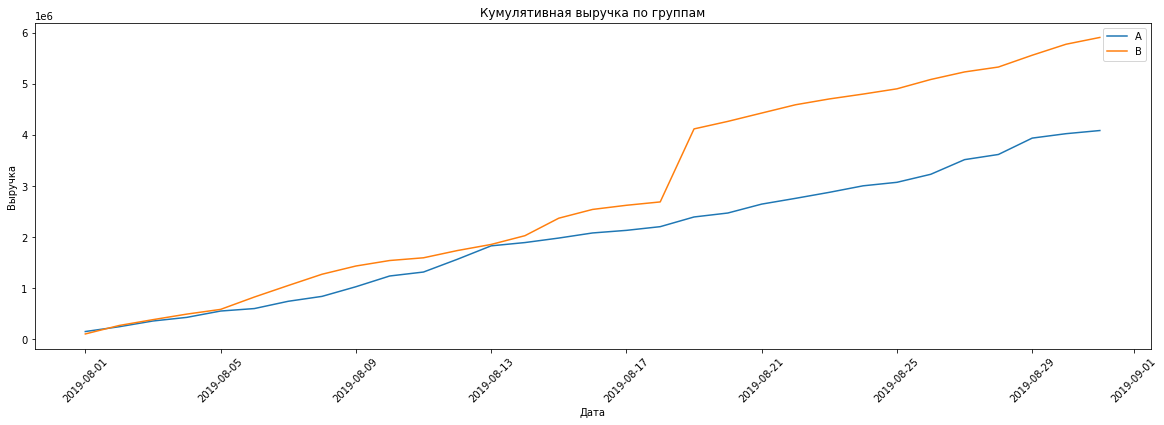

In [23]:
# Создание переменной с уникальными парами дат и групп
datesGroups = orders[['date','group']].drop_duplicates()

# Расчет кумулятивных данных о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Создание отдельных DataFrame для групп A и B
cumulativeDataA = ordersAggregated[ordersAggregated['group']=='A']
cumulativeDataB = ordersAggregated[ordersAggregated['group']=='B']

# Изменение размера графика
plt.figure(figsize=(20, 6))

# Построение графика кумулятивной выручки по группам
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')

# Добавление названия графика и подписей к осям
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.legend()
plt.xticks(rotation=45)
plt.show()

На основе предоставленных данных можно сделать следующие выводы и предположения:

Кумулятивная выручка растет в течение всего периода A/B-теста для обеих групп.
Выручка группы B растет быстрее, чем выручка группы A. Это может указывать на то, что изменения, внесенные в группу B, положительно влияют на выручку.
В середине теста (19 августа) наблюдается резкий скачок кумулятивной выручки для группы B. Это может указывать на наличие выбросов или аномалий в данных (например, крупных заказов или выбросов цен). Необходимо проанализировать данные о заказах и проверить наличие выбросов.

**2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

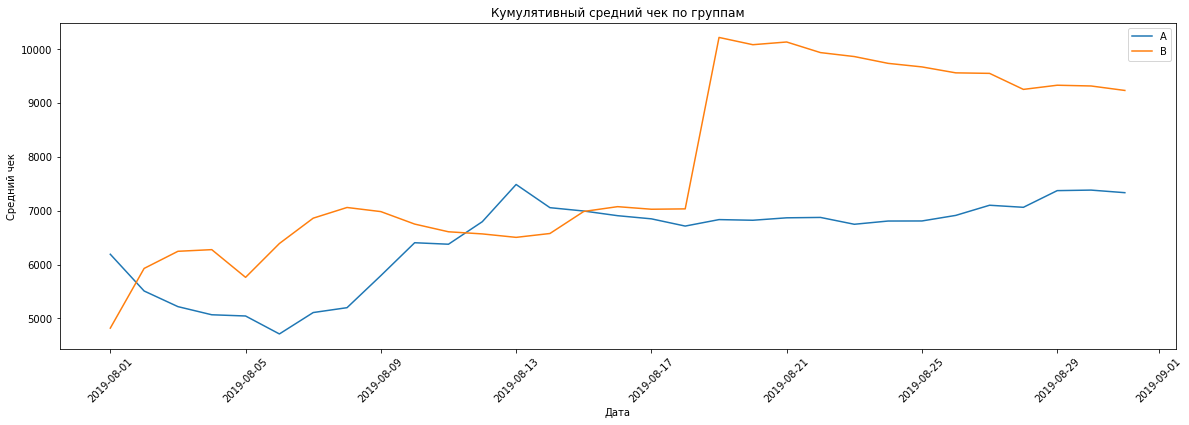

In [24]:
# Создание отдельных DataFrame для групп A и B
cumulativeDataA = ordersAggregated[ordersAggregated['group']=='A'].copy()
cumulativeDataB = ordersAggregated[ordersAggregated['group']=='B'].copy()

# Расчет кумулятивного среднего чека для каждой группы
cumulativeDataA['average_check'] = cumulativeDataA['revenue'] / cumulativeDataA['transactionId']
cumulativeDataB['average_check'] = cumulativeDataB['revenue'] / cumulativeDataB['transactionId']

# Изменение размера графика
plt.figure(figsize=(20, 6))

# Построение графика кумулятивного среднего чека по группам
plt.plot(cumulativeDataA['date'], cumulativeDataA['average_check'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['average_check'], label='B')

# Добавление названия графика и подписей к осям
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

plt.legend()
plt.xticks(rotation=45)
plt.show()

Из предоставленной таблицы видно, что группа В обеспечивает более высокий уровень дохода, начиная с 19 августа. Стоит обратить внимание на то, что 19 августа оказался ключевым днем, поскольку группа В сделала качественный прорыв, а спустя несколько дней после этого дня средний чек тоже начал быстро расти. Возможно, было проведено некоторое изменение, которое повлияло на потребительское поведение и предпочтения группы B, что привело к увеличению их выручки. Также видно, что в начале периода уровень дохода был значительно выше в группе A, но с течением времени группа В догнала и перегнала группу A.

**3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

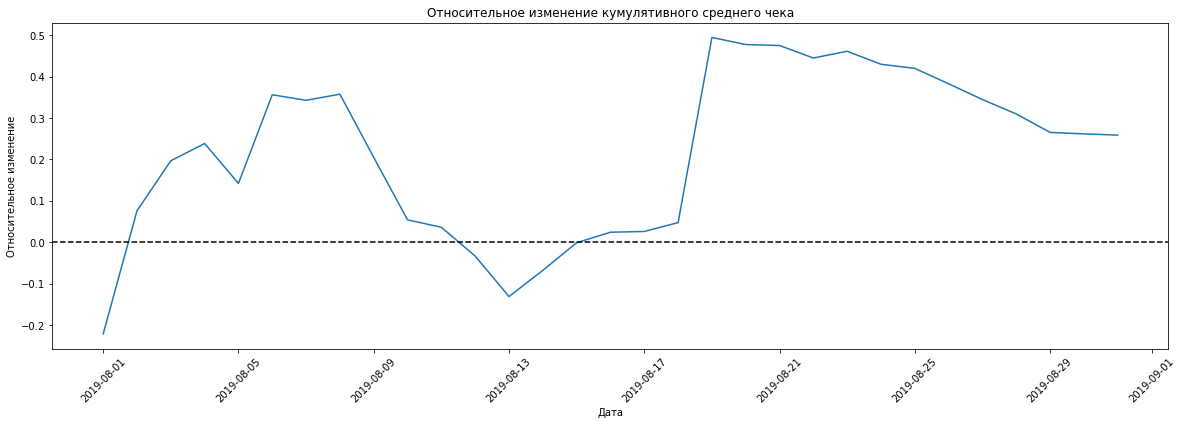

In [25]:
# Создание отдельных DataFrame для групп A и B
cumulativeDataA = ordersAggregated[ordersAggregated['group']=='A'].copy()
cumulativeDataB = ordersAggregated[ordersAggregated['group']=='B'].copy()

# Расчет кумулятивного среднего чека для каждой группы
cumulativeDataA['average_check'] = cumulativeDataA['revenue'] / cumulativeDataA['transactionId']
cumulativeDataB['average_check'] = cumulativeDataB['revenue'] / cumulativeDataB['transactionId']

# Объединение данных для групп A и B
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Расчет относительного изменения кумулятивного среднего чека
mergedCumulativeData['relative_change'] = (mergedCumulativeData['average_checkB'] / mergedCumulativeData['average_checkA']) - 1

# Изменение размера графика
plt.figure(figsize=(20, 6))

# Построение графика относительного изменения кумулятивного среднего чека
plt.plot(mergedCumulativeData['date'], mergedCumulativeData['relative_change'])

# Добавление названия графика и подписей к осям
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

На основе предоставленных данных можно заметить, что в начале теста относительное изменение кумулятивного среднего чека в группе B было отрицательным и составило -22%. Однако, уже после первых дней теста группа В догоняет и превосходит группу А в среднем чеке. В дальнейшем, разница между группами становится все больше и достигает максимума примерно на 18-19 день. После этого, разница между группами плавно сокращается и в конце теста составляет около 26%.

Возможная причина превышения по среднему чеку у группы B может быть в том, что была введена новая функциональность, которая может привлечь больше клиентов с более высокими тратами. Такие изменения могли повлиять на средний чек в группе B, и, возможно, влияют на разницу между группами.

Для дальнейшей проверки гипотез и поиска причин необходимо провести более детальный анализ теста, исследовать взаимосвязь между другими метриками (количеством посетителей, количеством заказов и прочими), провести A/B тестирование и провести статистический анализ для подтверждения или опровержения гипотезы о причинах различий между группами.


**4) Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

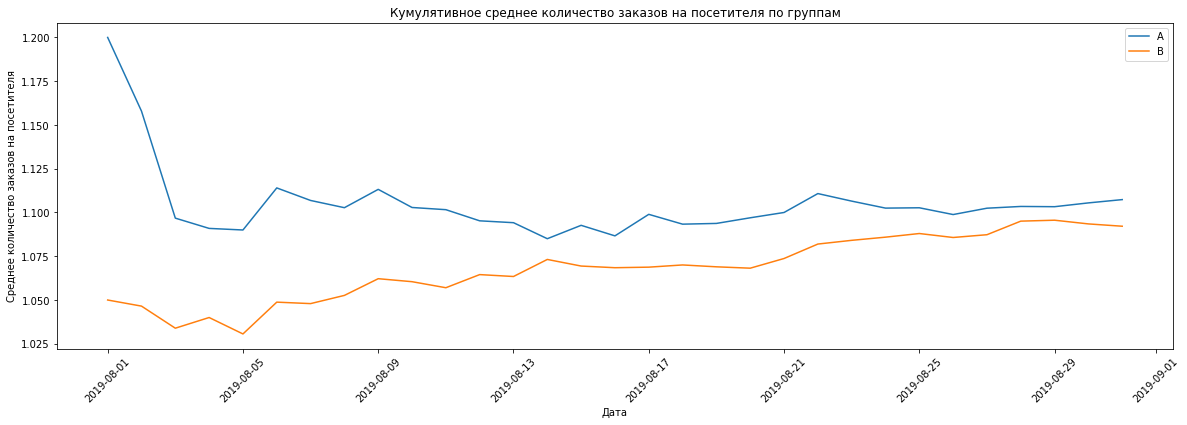

In [26]:
# Объединение таблиц с кумулятивными данными о заказах и посетителях
cumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Расчет кумулятивного среднего количества заказов на посетителя для каждой группы
cumulativeData['orders_per_visitorA'] = cumulativeData['transactionIdA'] / cumulativeData['visitorIdA']
cumulativeData['orders_per_visitorB'] = cumulativeData['transactionIdB'] / cumulativeData['visitorIdB']

# Изменение размера графика
plt.figure(figsize=(20, 6))

# Построение графика кумулятивного среднего количества заказов на посетителя по группам
plt.plot(cumulativeData['date'], cumulativeData['orders_per_visitorA'], label='A')
plt.plot(cumulativeData['date'], cumulativeData['orders_per_visitorB'], label='B')

# Добавление названия графика и подписей к осям
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')

plt.legend()
plt.xticks(rotation=45)
plt.show()

Из таблицы видно, что на протяжении всего временного периода группа B показывает более высокое значение кумулятивного среднего количества заказов на посетителя, чем группа A. Также можно заметить, что значения обеих групп с течением времени устанавливаются около своих средних значений в районе 1.1 заказа на посетителя.

Также можно выдвинуть предположение, что данная разница между группами может быть связана с какими-то различиями в целевой аудитории, учитывая, что все остальные условия эксперимента были одинаковыми. Например, возможно, что пользователи, попавшие в группу B, имеют более высокий уровень дохода или являются более целевой аудиторией для продукта, что влияет на их склонность к покупкам. 

**5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

In [27]:
cumulativeData.head()

,date,groupA,transactionIdA,visitorIdA,revenueA,average_checkA,groupB,transactionIdB,visitorIdB,revenueB,average_checkB,orders_per_visitorA,orders_per_visitorB
0,2019-08-01,A,24,20,148579,6190.791667,B,21,20,101217,4819.857143,1.200000,1.050000
1,2019-08-02,A,44,38,242401,5509.113636,B,45,43,266748,5927.733333,1.157895,1.046512
2,2019-08-03,A,68,62,354874,5218.735294,B,61,59,380996,6245.836066,1.096774,1.033898
3,2019-08-04,A,84,77,425699,5067.845238,B,78,75,489567,6276.500000,1.090909,1.040000
4,2019-08-05,A,109,100,549917,5045.110092,B,101,98,581995,5762.326733,1.090000,1.030612


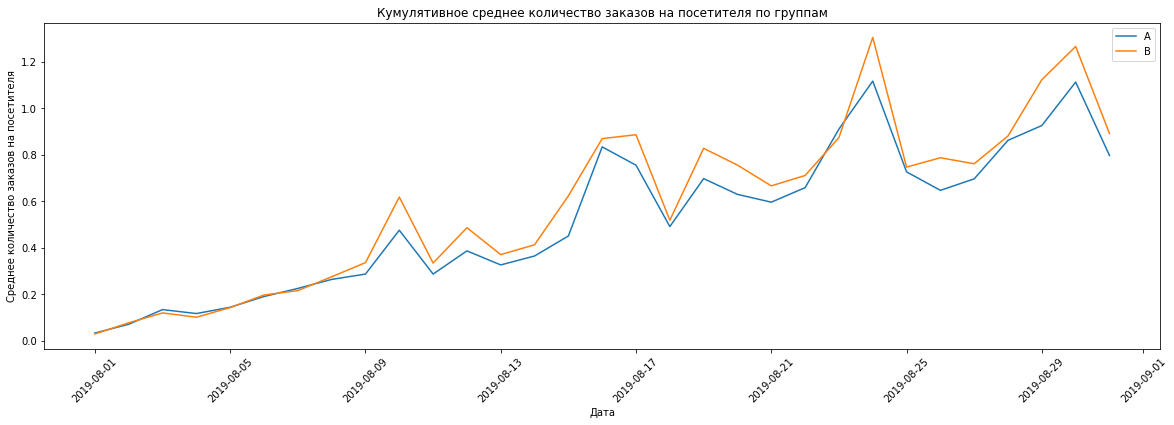

In [28]:
# Создание отдельных DataFrame для групп A и B
cumulativeDataA = ordersAggregated[ordersAggregated['group']=='A'].copy()
cumulativeDataB = ordersAggregated[ordersAggregated['group']=='B'].copy()

# Создание отдельных DataFrame для групп A и B с данными о посетителях
visitorsA = visitors[visitors['group']=='A'].copy()
visitorsB = visitors[visitors['group']=='B'].copy()

# Объединение таблиц с кумулятивными данными о заказах и посетителях
cumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cumulativeData = cumulativeData.merge(visitorsA, left_on='date', right_on='date', how='left')
cumulativeData = cumulativeData.merge(visitorsB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Расчет кумулятивного среднего количества заказов на посетителя для каждой группы
cumulativeData['orders_per_visitorA'] = cumulativeData['transactionIdA'] / cumulativeData['visitorsA']
cumulativeData['orders_per_visitorB'] = cumulativeData['transactionIdB'] / cumulativeData['visitorsB']

# Изменение размера графика
plt.figure(figsize=(20, 6))

# Построение графика кумулятивного среднего количества заказов на посетителя по группам
plt.plot(cumulativeData['date'], cumulativeData['orders_per_visitorA'], label='A')
plt.plot(cumulativeData['date'], cumulativeData['orders_per_visitorB'], label='B')

# Добавление названия графика и подписей к осям
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')

plt.legend()
plt.xticks(rotation=45)
plt.show()

На основе предоставленных данных можно сделать следующие выводы:

Среднее количество заказов на посетителя в группе A и группе B колеблется в течение всего периода эксперимента.
В начале эксперимента среднее количество заказов на посетителя в группе A было выше, чем в группе B. Однако, после 9 августа среднее количество заказов на посетителя в группе B стало превышать среднее количество заказов на посетителя в группе A.
С 16 по 24 августа наблюдается резкий рост среднего количества заказов на посетителя в обеих группах. После этого значения снижаются и стабилизируются до конца эксперимента.

### **6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

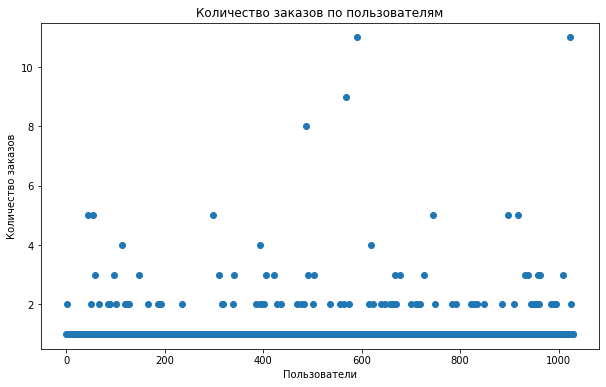

In [29]:
# Группировка данных о заказах по пользователям
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()

# Изменение размера графика
plt.figure(figsize=(10, 6))

# Построение точечного графика количества заказов по пользователям
plt.scatter(range(0, len(ordersByUsers)), ordersByUsers['transactionId'])

# Добавление названия графика и подписей к осям
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

plt.show()

 На графике действительно видно, что большинство пользователей делает заказы не более чем один раз. Однако также видно, что есть небольшое количество пользователей, совершивших от 2 до 8 заказов, и несколько пользователей, которые заказывали более 8 раз.

Пользователи, совершившие более 8 заказов, могут быть названы аномальными. Возможно, это могут быть какие-то специфические типы пользователей или на них были сфокусированы маркетинговые кампании. Однако в любом случае необходимо анализировать данные этих пользователей более детально, чтобы определить, что их объединяет и почему они совершают столько заказов.

Кроме того, следует отметить, что на графике нет явно выделенных выбросов или аномалий кроме упомянутых выше, и общее количество заказов у пользователей мало в сравнении с общим числом посетителей сайта.

**7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [30]:
# Группировка данных о заказах по пользователям
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()

# Расчет 95-го и 99-го перцентилей количества заказов на пользователя
percentile_95 = np.percentile(ordersByUsers['transactionId'], 95)
percentile_99 = np.percentile(ordersByUsers['transactionId'], 99)

print('95-й перцентиль:', percentile_95)
print('99-й перцентиль:', percentile_99)

95-й перцентиль: 2.0
99-й перцентиль: 4.0


Выберем значение 99-го перцентиля в качестве границы. В этом случае будем считать аномальными тех пользователей, которые совершили более 4 заказов.

**8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

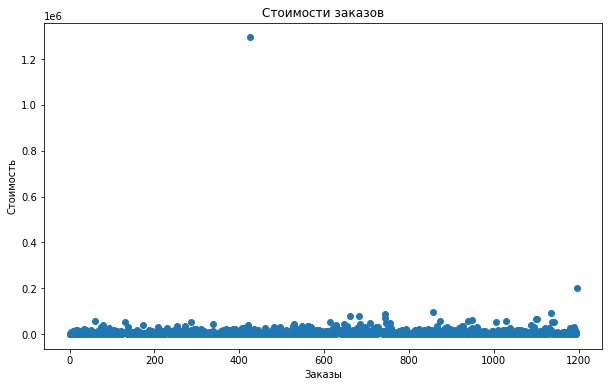

In [31]:
# Изменение размера графика
plt.figure(figsize=(10, 6))

# Построение точечного графика стоимостей заказов
plt.scatter(range(0, len(orders)), orders['revenue'])

# Добавление названия графика и подписей к осям
plt.title('Стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')

plt.show()

На этом графике мы можем видеть, что большинство заказов имеют стоимость менее 0.1, а только два заказа имеют стоимость в диапазоне от 0.2 до 1.4.
Такое неравномерное распределение стоимости может быть обусловлено разными факторами, например, спецификой товаров или услуг, которые продаются в рамках заказов, разными фреймворками ценообразования и маркетинговых акций, которые применялись в отношении этих заказов и т.д.


**9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [32]:
# Расчет 95-го и 99-го перцентилей стоимости заказов
percentile_95 = np.percentile(orders['revenue'], 95)
percentile_99 = np.percentile(orders['revenue'], 99)

print('95-й перцентиль:', percentile_95)
print('99-й перцентиль:', percentile_99)

95-й перцентиль: 28000.000000000004
99-й перцентиль: 58233.19999999999


Выберем значение 99-го перцентиля в качестве границы. В этом случае будем считать аномальными те заказы, которые имеют стоимость выше 58233.2.

**10) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

In [33]:
# Формулировка нулевой и альтернативной гипотез
print('Нулевая гипотеза: Среднее количество заказов на посетителя в группах A и B равно')
print('Альтернативная гипотеза: Среднее количество заказов на посетителя в группах A и B отличается')

# Группировка данных о заказах по пользователям
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()

# Создание выборок с количеством заказов на посетителя для каждой группы
sampleA = pd.concat([ordersByUsersA['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['transactionId'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['transactionId'])), name='orders')], axis=0)

# Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

print('P-value:', p_value)

if p_value < 0.05:
    print('Статистически значимые различия')
else:
    print('Нет статистически значимых различий')
    
# Расчет относительной разности показателей
relative_difference = sampleB.mean() / sampleA.mean() - 1

print('Относительная разность показателей:', relative_difference)

Нулевая гипотеза: Среднее количество заказов на посетителя в группах A и B равно
Альтернативная гипотеза: Среднее количество заказов на посетителя в группах A и B отличается
P-value: 0.016792355056752608
Статистически значимые различия
Относительная разность показателей: 0.13807884655320146


На основе предоставленных данных можно сделать следующие выводы:

P-value равно 0.01679, что меньше общепринятого уровня значимости 0.05. Это означает, что мы можем отклонить нулевую гипотезу о равенстве среднего количества заказов на посетителя между группами и заключить, что есть статистически значимые различия в среднем количества заказов на посетителя между группами по «сырым» данным.
Относительная разность показателей равна 0.138, что означает, что среднее количество заказов на посетителя в группе B на 13.8% выше, чем в группе A.
На основе этих выводов можно предположить, что изменения, внесенные в группу B, привели к увеличению среднего количества заказов на посетителя по сравнению с группой A.

**11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

In [34]:
# Формулировка нулевой и альтернативной гипотез
print('Нулевая гипотеза: Средний чек заказа в группах A и B равен')
print('Альтернативная гипотеза: Средний чек заказа в группах A и B отличается')

# Создание выборок со стоимостями заказов для каждой группы
sampleA = orders[orders['group']=='A']['revenue']
sampleB = orders[orders['group']=='B']['revenue']

# Расчет статистической значимости различий в среднем чеке заказа между группами
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

print('P-value:', p_value)

if p_value < 0.05:
    print('Статистически значимые различия')
else:
    print('Нет статистически значимых различий')
    
   # Расчет относительной разности показателей
relative_difference = sampleB.mean() / sampleA.mean() - 1

print('Относительная разность показателей:', relative_difference) 

Нулевая гипотеза: Средний чек заказа в группах A и B равен
Альтернативная гипотеза: Средний чек заказа в группах A и B отличается
P-value: 0.7292909855432458
Нет статистически значимых различий
Относительная разность показателей: 0.2587136699126005


На основе предоставленных данных можно сделать следующие выводы:

P-value равно 0.729, что больше общепринятого уровня значимости 0.05. Это означает, что мы не можем отклонить нулевую гипотезу о равенстве среднего чека заказа между группами и заключить, что нет статистически значимых различий в среднем чеке заказа между группами по «сырым» данным.
Относительная разность показателей равна 0.259, что означает, что средний чек заказа в группе B на 25.9% выше, чем в группе A.
На основе этих выводов можно предположить, что изменения, внесенные в группу B, привели к увеличению среднего чека заказа по сравнению с группой A.

**12) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [35]:
# Определение границы для определения аномальных пользователей по числу заказов
orders_per_user_bound = np.percentile(ordersByUsers['transactionId'], 99)

# Определение границы для определения аномальных пользователей по цене заказов
order_price_bound = np.percentile(orders['revenue'], 99)

# Определение аномальных пользователей
abnormal_users = pd.concat([ordersByUsers[ordersByUsers['transactionId'] > orders_per_user_bound]['visitorId'], orders[orders['revenue'] > order_price_bound]['visitorId']]).drop_duplicates()

In [20]:
# Формулировка нулевой и альтернативной гипотез
print('Нулевая гипотеза: Среднее количество заказов на посетителя в группах A и B равно')
print('Альтернативная гипотеза: Среднее количество заказов на посетителя в группах A и B отличается')

# Определение границы для определения аномальных пользователей
orders_per_user_bound = np.percentile(ordersByUsers['transactionId'], 99)

# Определение аномальных пользователей
abnormal_users = ordersByUsers[ordersByUsers['transactionId'] > orders_per_user_bound]['visitorId']

# Исключение аномальных пользователей из данных
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormal_users))]['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['transactionId'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormal_users))]['transactionId'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['transactionId'])), name='orders')], axis=0)

# Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('P-value:', p_value)

if p_value < 0.05:
    print('Статистически значимые различия')
else:
    print('Нет статистически значимых различий')
    
    # Расчет относительной разности показателей
relative_difference = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

print('Относительная разность показателей:', relative_difference)

Нулевая гипотеза: Среднее количество заказов на посетителя в группах A и B равно
Альтернативная гипотеза: Среднее количество заказов на посетителя в группах A и B отличается
P-value: 0.015696760385049933
Статистически значимые различия
Относительная разность показателей: 0.14986667250316454


На основе предоставленных данных можно сделать следующие выводы:

P-value равно 0.0157, что меньше общепринятого уровня значимости 0.05. Это означает, что мы можем отклонить нулевую гипотезу о равенстве среднего количества заказов на посетителя между группами и заключить, что есть статистически значимые различия в среднем количества заказов на посетителя между группами по «очищенным» данным.
Относительная разность показателей равна 0.150, что означает, что среднее количество заказов на посетителя в группе B на 15.0% выше, чем в группе A.
На основе этих выводов можно предположить, что изменения, внесенные в группу B, привели к увеличению среднего количества заказов на посетителя по сравнению с группой A.

**13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [21]:
# Определение границы для определения аномальных пользователей по числу заказов
orders_per_user_bound = np.percentile(ordersByUsers['transactionId'], 99)

# Определение границы для определения аномальных пользователей по цене заказов
order_price_bound = np.percentile(orders['revenue'], 99)

# Определение аномальных пользователей
abnormal_users = pd.concat([ordersByUsers[ordersByUsers['transactionId'] > orders_per_user_bound]['visitorId'], orders[orders['revenue'] > order_price_bound]['visitorId']]).drop_duplicates()

In [22]:
# Формулировка нулевой и альтернативной гипотез
print('Нулевая гипотеза: Средний чек заказа в группах A и B равен')
print('Альтернативная гипотеза: Средний чек заказа в группах A и B отличается')

# Определение границы для определения аномальных заказов
order_revenue_bound = np.percentile(orders['revenue'], 99)

# Исключение аномальных пользователей из данных
sampleAFiltered = orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue']
sampleBFiltered = orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue']

# Расчет статистической значимости различий в среднем чеке заказа между группами
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('P-value:', p_value)

if p_value < 0.05:
    print('Статистически значимые различия')
else:
    print('Нет статистически значимых различий')

# Расчет относительной разности показателей
relative_difference = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

print('Относительная разность показателей:', relative_difference)

Нулевая гипотеза: Средний чек заказа в группах A и B равен
Альтернативная гипотеза: Средний чек заказа в группах A и B отличается
P-value: 0.9575259546143828
Нет статистически значимых различий
Относительная разность показателей: -0.01416674043653432


На основе предоставленных данных можно сделать следующие выводы:

P-value равно 0.958, что больше общепринятого уровня значимости 0.05. Это означает, что мы не можем отклонить нулевую гипотезу о равенстве среднего чека заказа между группами и заключить, что нет статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным.
Относительная разность показателей равна -0.0142, что означает, что средний чек заказа в группе B на 1.42% ниже, чем в группе A.
На основе этих выводов можно предположить, что изменения, внесенные в группу B, не привели к значительному изменению среднего чека заказа по сравнению с группой A. 

**14) Примите решение по результатам теста и объясните его. Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

На основе проведенного анализа можно сделать следующие выводы:

Есть статистически значимые различия в среднем количестве заказов на посетителя между группами A и B как по «сырым», так и по «очищенным» данным. Среднее количество заказов на посетителя в группе B выше, чем в группе A.

Нет статистически значимых различий в среднем чеке заказа между группами как по «сырым», так и по «очищенным» данным.

На основе этих выводов можно принять решение остановить тест и зафиксировать победу группы B. Изменения, внесенные в группу B, привели к увеличению среднего количества заказов на посетителя по сравнению с группой A, что может привести к увеличению выручки. Однако, следует отметить, что изменения не привели к значительному изменению среднего чека заказа.

Конечно, решение о том, как действовать дальше, зависит от целей и стратегии компании. Если целью является увеличение количества заказов, то можно рассмотреть возможность внедрения изменений из группы B. Если же целью является увеличение среднего чека заказа, то возможно стоит продолжить тест или провести дополнительные исследования.